# CLIP HAS CHANGED MY LIFE
https://medium.com/@kerry.halupka/getting-started-with-openais-clip-a3b8f5277867

In [2]:
import torch
from transformers import CLIPProcessor, CLIPModel
import os
from PIL import Image
from IPython.display import display, HTML

In [3]:
def load_images(path, output=True):
    """
    Loads all images from specified path and returns them and their pathes
    """
    images = []
    paths = []
    
    for filename in os.listdir(path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            filepath = os.path.join(path, filename)
            image = Image.open(filepath)
            images.append(image)
            paths.append(filepath)
    if output:
        print(f"Uploaded {len(images)} images")
    return images, paths

def get_top_k_images(images, logits, paths, top_k=5):
    """
    Returns most corresponding images for each querry
    """
    num_images, num_queries = logits.shape
    top_k_images_per_query = []
    top_k_paths_per_query = []
    top_k_indices_per_query = []

    for i in range(num_queries):
        top_k_indices = torch.topk(logits.T[i], top_k, dim=0).indices
        top_k_images = [images[j] for j in top_k_indices]
        top_k_paths = [paths[j] for j in top_k_indices]

        top_k_images_per_query.append(top_k_images)
        top_k_paths_per_query.append(top_k_paths)
        top_k_indices_per_query.append(top_k_indices.tolist())

    return top_k_images_per_query, top_k_paths_per_query, top_k_indices_per_query

def display_images(images, paths, width=100):
    """
    Thank you GPT
    """
    images_html = ''.join([f'<img src="{path}" width="{width}px" style="margin-right: 10px;">' for path in paths])
    display(HTML(images_html))


In [4]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32") # hugging lover
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
images, paths = load_images('.\images')

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
C:\Users\IBS5100\AppData\Local\Temp\ipykernel_7788\3562282230.py:3: SyntaxWarning: invalid escape sequence '\i'
  images, paths = load_images('.\images')
C:\Programs\Anaconda\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Uploaded 10 images


In [5]:
# Target image description
querry = ['blue ocean with clear sky and shining sum and some text on top of it'] # for something-wrong.jpg
# querry = ['The cow is licking her lips'] # for sexy-cow.jpg

inputs = processor(text=querry, images=images, return_tensors="pt", padding=True, do_convert_rgb=False)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

Top images:
1
tensor([32.2958], grad_fn=<SelectBackward0>)
.


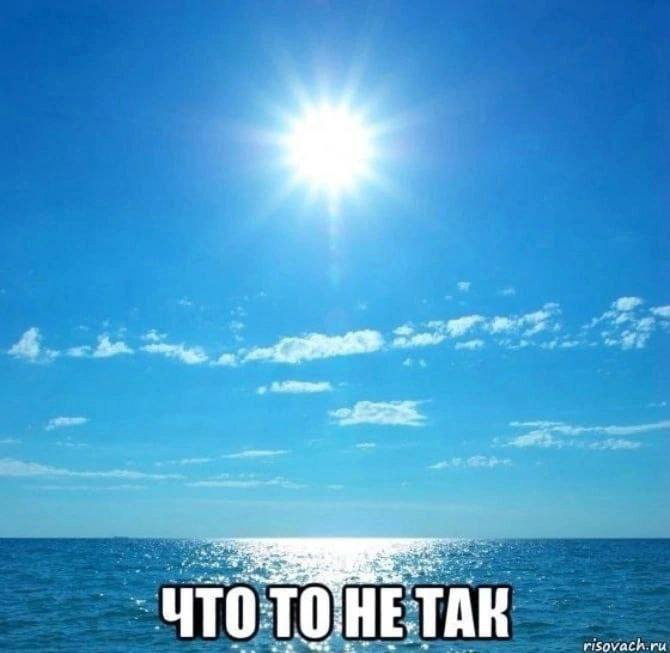

In [6]:
# Get most corresponding
top_images, top_paths, top_indices = get_top_k_images(images, logits_per_image, paths, top_k=1)
print("Top images:")
for i, (index, (img, path)) in enumerate(zip(top_indices[0], zip(top_images[0], top_paths[0]))):
    print(i + 1)
    print(logits_per_image[index])
    print(path[i])
    display(img)

In [7]:
# Try find all images
querries = ['two men draw a trigonometric circle on the ground', 'atmospheric image of a street in fog', 'ninja turtle dog',
           'the squirrel raised his hands in the air', 'image of pudge the crooked-toothed monster butcher', 'birthday of goth girl',
           'a blond funny man with long hair in the audience and an text on top of the picture', 'the cow is licking her lips',
           'blue ocean with clear sky and shining sum and some text on top of it', 'a beautiful mountain fairy-tale landscape with waterfalls']

inputs = processor(text=querries, images=images, return_tensors="pt", padding=True, do_convert_rgb=False)

outputs = model(**inputs)
logits = outputs.logits_per_image 

horizontal axis - images, vertical axis - promts

In [9]:
images_lists, paths_lists, indices_lists = get_top_k_images(images, logits, paths, top_k=2)
for i, (images_list, (paths_list, indices_list)) in enumerate(zip(images_lists, zip(paths_lists, indices_lists))):
    print('Querry: ' + querries[i] + '. Results:')
    display_images(images_list, paths_list, width=125)
    print('\n')

Querry: two men draw a trigonometric circle on the ground. Results:




Querry: atmospheric image of a street in fog. Results:




Querry: ninja turtle dog. Results:




Querry: the squirrel raised his hands in the air. Results:




Querry: image of pudge the crooked-toothed monster butcher. Results:




Querry: birthday of goth girl. Results:




Querry: a blond funny man with long hair in the audience and an text on top of the picture. Results:




Querry: the cow is licking her lips. Results:




Querry: blue ocean with clear sky and shining sum and some text on top of it. Results:




Querry: a beautiful mountain fairy-tale landscape with waterfalls. Results:
